`part of Jose Portilla's course`

# Color Mappings - Blending and pasting images - Masking Images - Thresholding - Gamma correction - Blurring - Morphological operations - Gradients



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

# Color Mappings

1. RGB = Red Green Blue
2. HSL = Hue Saturation Lightness (cylinder model)
3. HSV = Hue Saturation Value

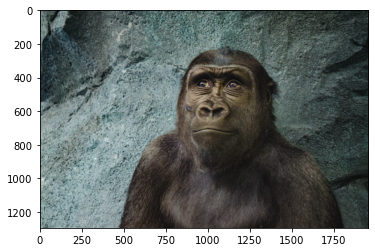

In [2]:
img = cv2.imread("data/gorilla.jpg")
plt.imshow(img)

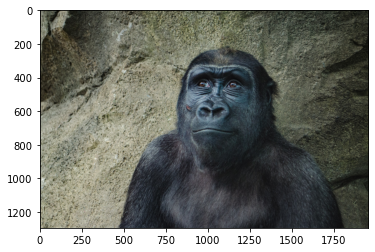

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

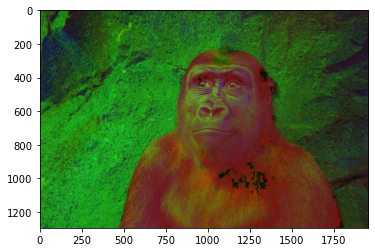

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
plt.imshow(img)

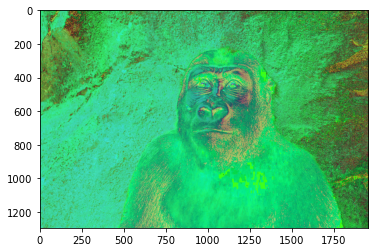

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img)

# Blending and pasting images

`addWeightage = alpha * img1 + beta * img2 + gamma`

In [6]:
img1 = cv2.imread("data/dog_backpack.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("data/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

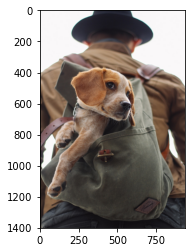

In [7]:
plt.imshow(img1)

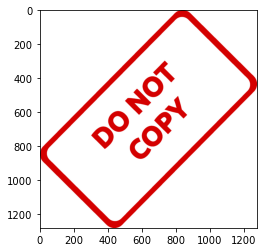

In [8]:
plt.imshow(img2)

### Blending images of same size

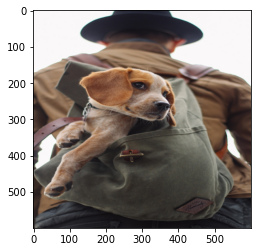

In [9]:
img1 = cv2.resize(img1, (600, 600))
plt.imshow(img1)

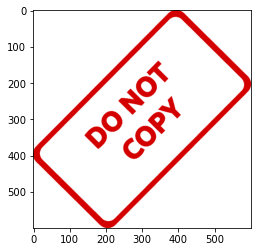

In [10]:
img2 = cv2.resize(img2, (600, 600))
plt.imshow(img2)

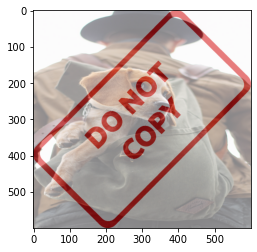

In [11]:
blend = cv2.addWeighted(img1, 0.5, img2, 0.5, gamma=0)
plt.imshow(blend)

### Overlay one image on top of the other

"numpy reasignment of pixel values"

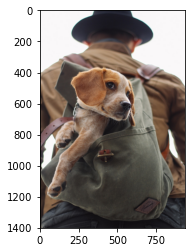

In [12]:
img1 = cv2.imread("data/dog_backpack.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

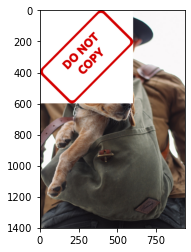

In [13]:
img1[0:0+img2.shape[0], 0:0+img2.shape[1]] = img2
plt.imshow(img1)

# Masking Images

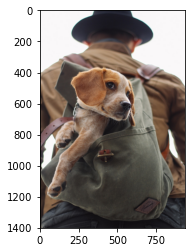

In [14]:
img1 = cv2.imread("data/dog_backpack.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

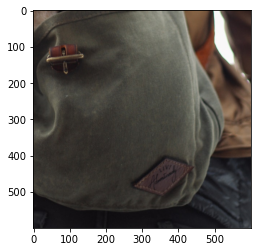

In [15]:
x = img1.shape[1]- 600
y = img1.shape[0]- 600
roi = img1[y:y+img1.shape[0], x:x+img1.shape[1]]
plt.imshow(roi)

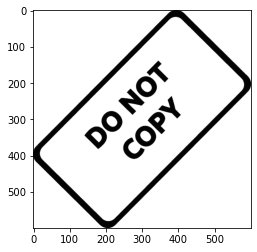

In [16]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray, cmap='gray')

In [17]:
img2_gray.shape

(600, 600)

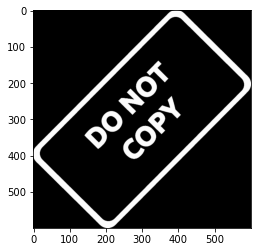

In [18]:
mask = cv2.bitwise_not(img2_gray)
plt.imshow(mask, cmap='gray')

In [19]:
white = np.full(img2.shape, 255)
white.shape

(600, 600, 3)

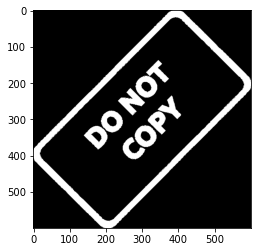

In [20]:
bk = cv2.bitwise_or(white, white, mask=mask)
plt.imshow(bk)

In [21]:
bk.shape

(600, 600, 3)

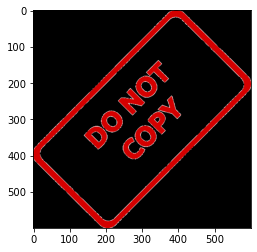

In [22]:
copy = cv2.bitwise_or(img2, img2, mask=mask)
plt.imshow(copy)

In [23]:
copy.shape

(600, 600, 3)

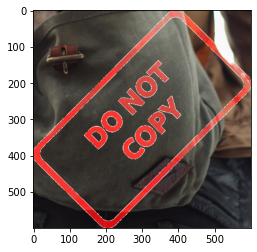

In [24]:
final_roi = cv2.bitwise_or(roi, copy)
plt.imshow(final_roi)

# Thresholding

In [25]:
low = 127
high = 255

ret, th1 = cv2.threshold(img, low, high, cv2.THRESH_BINARY)      # if pix > thresh:max else: 0
ret, th2 = cv2.threshold(img, low, high, cv2.THRESH_BINARY_INV)  # if pix > thresh:0 else: max
ret, th3 = cv2.threshold(img, low, high, cv2.THRESH_TRUNC)       # if pix > thresh:thresh else: pix
ret, th5 = cv2.threshold(img, low, high, cv2.THRESH_TOZERO)      # if pix > thresh:pix else: 0
ret, th6 = cv2.threshold(img, low, high, cv2.THRESH_TOZERO_INV)  # if pix > thresh:0 else: pix

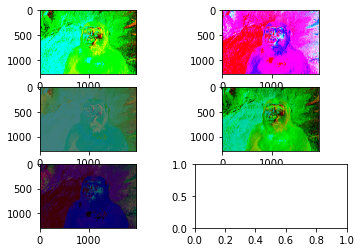

In [26]:
fig, ax = plt.subplots(3,2)

ax[0][0].imshow(th1, cmap='gray')  
ax[0][1].imshow(th2, cmap='gray')  
ax[1][0].imshow(th3, cmap='gray')  
ax[1][1].imshow(th5, cmap='gray')
ax[2][0].imshow(th6, cmap='gray')

# Gamma correction

`pix^{gamma_value}`

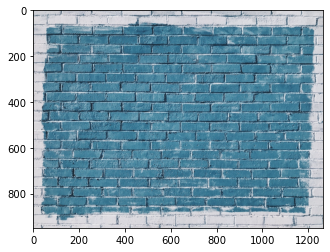

In [27]:
img = cv2.imread("data/bricks.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


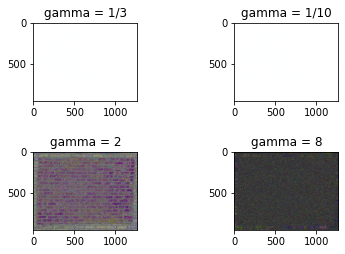

In [28]:
fig, ax = plt.subplots(2,2)
fig.tight_layout(pad=3.0)



gamma = 1/3
r1 = np.power(img, gamma)
ax[0][0].imshow(r1)
ax[0][0].title.set_text("gamma = 1/3")

gamma = 1/10
r2 = np.power(img, gamma)
ax[0][1].imshow(r2)
ax[0][1].title.set_text("gamma = 1/10")

gamma = 2
r3 = np.power(img, gamma)
ax[1][0].imshow(r3)
ax[1][0].title.set_text("gamma = 2")

gamma = 8
r4 = np.power(img, gamma)
ax[1][1].imshow(r4)
ax[1][1].title.set_text("gamma = 8")


# Blurring


1. `cv2.blur()`  : Takes an average of all pixels in the kernel area and replaces the average value with central pixel.
2. `cv2.GaussianBlur()`: Uses a gaussian functioned kernel instead of a box filter.
3. `cv2.medianblur()`: Takes an median of all pixels in the kernel area and replaces the median value with central pixel.

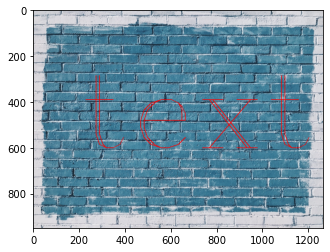

In [29]:
img = cv2.imread("data/bricks.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img, text="text", org=(200, 600), fontFace=font, fontScale=15, color=(255,0,0), thickness=2)

plt.imshow(img)

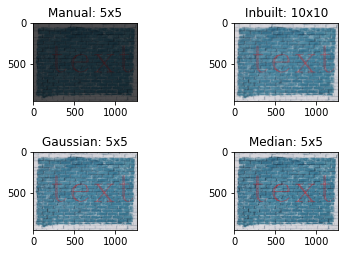

In [30]:
fig, ax = plt.subplots(2,2)
fig.tight_layout(pad=3.0)


kernel = np.ones(shape=(3,3), dtype=np.float)/25
manual_blur = cv2.filter2D(img, -1, kernel)
ax[0][0].imshow(manual_blur)
ax[0][0].title.set_text('Manual: 5x5')

inbuilt_blur = cv2.blur(img, ksize=(10,10))
ax[0][1].imshow(inbuilt_blur)
ax[0][1].title.set_text('Inbuilt: 10x10')

gaussian_blur = cv2.GaussianBlur(img, (5,5), 10)
ax[1][0].imshow(gaussian_blur)
ax[1][0].title.set_text('Gaussian: 5x5')

median_blur = cv2.medianBlur(img, 5) #square kernel
ax[1][1].imshow(median_blur)
ax[1][1].title.set_text('Median: 5x5')


#ax[1][0].imshow(th3)
#ax[1][1].imshow(th5)


# Morphological operations

1. Erosion: Replaces the pixel value with kernel's min value => makes the white image look smaller
2. Dilation: Replaces the pixel value with kernel's max value => makes the white image look bigger
2. Opening : Erosion + Dilation => helpful in removing background noise
3. Closing : Dilation + Erosion => helpful for removing foreground noise
4. Gradients :Dilation - Erosion => edge detection

### Erosion

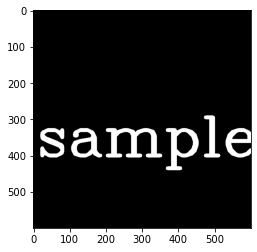

In [31]:
blank = np.zeros((600,600))
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(blank, text="sample", fontFace=font, org=(10,400), fontScale=5, thickness=10, color=(255,255,255))

plt.imshow(blank, cmap='gray')

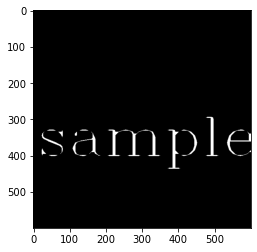

In [32]:
kernel = np.ones((5,5))
result = cv2.erode(blank, kernel, iterations=2)

plt.imshow(result, cmap='gray')

### Dilation

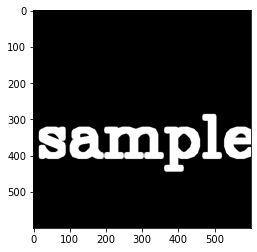

In [33]:
kernel = np.ones((5,5))
result = cv2.dilate(blank, kernel, iterations=2)

plt.imshow(result, cmap='gray')

### Opening

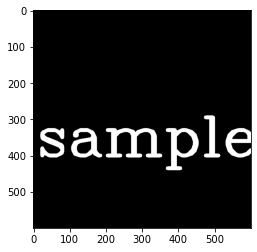

In [34]:
blank = np.zeros((600,600))
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(blank, text="sample", fontFace=font, org=(10,400), fontScale=5, thickness=10, color=(255,255,255))

plt.imshow(blank, cmap='gray')

##### Background noise

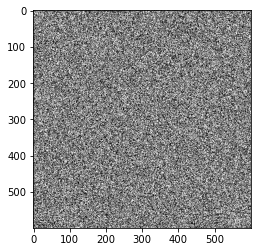

In [35]:
noise = np.random.randint(0, 2, size=(600,600))
noise = noise * 255
plt.imshow(noise, cmap='gray')

In [36]:
noise

array([[255, 255,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255, 255, 255],
       [255,   0,   0, ..., 255,   0, 255],
       ...,
       [  0,   0, 255, ..., 255,   0, 255],
       [255, 255,   0, ..., 255,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0]])

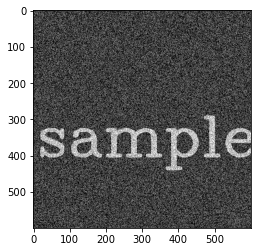

In [37]:
noisy = noise + blank
plt.imshow(noisy, cmap='gray')

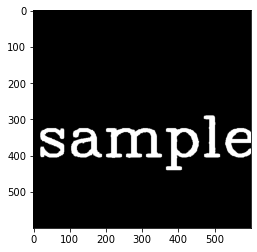

In [38]:
opening = cv2.morphologyEx(noisy, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')

##### Foreground noise

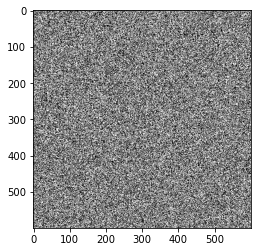

In [39]:
noise = np.random.randint(0, 2, size=(600,600))
noise = noise * -255
plt.imshow(noise, cmap='gray')

In [40]:
noise

array([[   0, -255, -255, ..., -255, -255,    0],
       [-255,    0,    0, ...,    0,    0,    0],
       [-255, -255,    0, ...,    0, -255, -255],
       ...,
       [   0, -255, -255, ...,    0,    0, -255],
       [   0, -255, -255, ..., -255, -255,    0],
       [   0,    0,    0, ..., -255, -255,    0]])

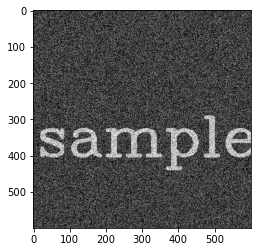

In [41]:
noisy = noise + blank
plt.imshow(noisy, cmap='gray')

In [42]:
noisy[noisy == -255] = 0

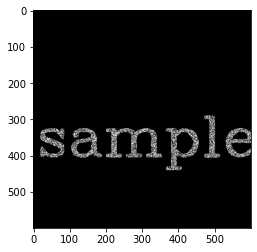

In [43]:
plt.imshow(noisy, cmap='gray')

### Closing

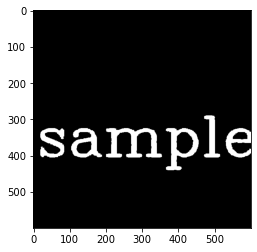

In [44]:
closing = cv2.morphologyEx(noisy, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')

# Gradients

Directional change in the intensity or color in an image

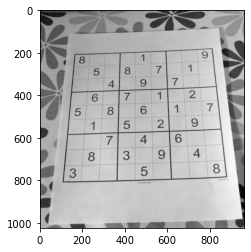

In [45]:
img = cv2.imread("data/sudoku.jpg", 0)
plt.imshow(img, cmap='gray')

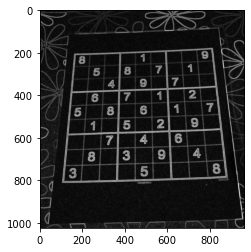

In [46]:
grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(grad, cmap='gray')

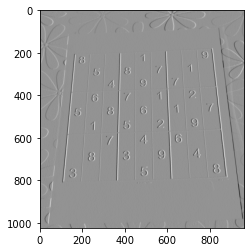

In [47]:
sobel_x = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
plt.imshow(sobel_x, cmap='gray')

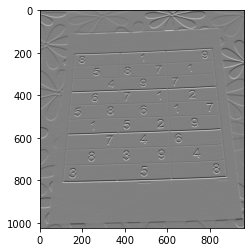

In [48]:
sobel_y = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
plt.imshow(sobel_y, cmap='gray')

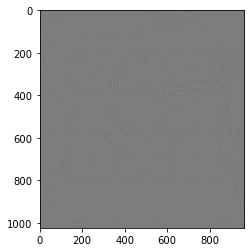

In [49]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
plt.imshow(laplacian, cmap='gray')